In [1]:
%matplotlib notebook
import numpy as np
from scipy.sparse import csgraph
import matplotlib.pyplot as plt
import numpy.linalg as la
from sklearn import datasets
from sklearn.metrics import pairwise

Generate the dataset

In [2]:
n_samples = 1000
noise = 0.05
X, Y = datasets.make_moons(n_samples=n_samples, noise=noise)

<IPython.core.display.Javascript object>


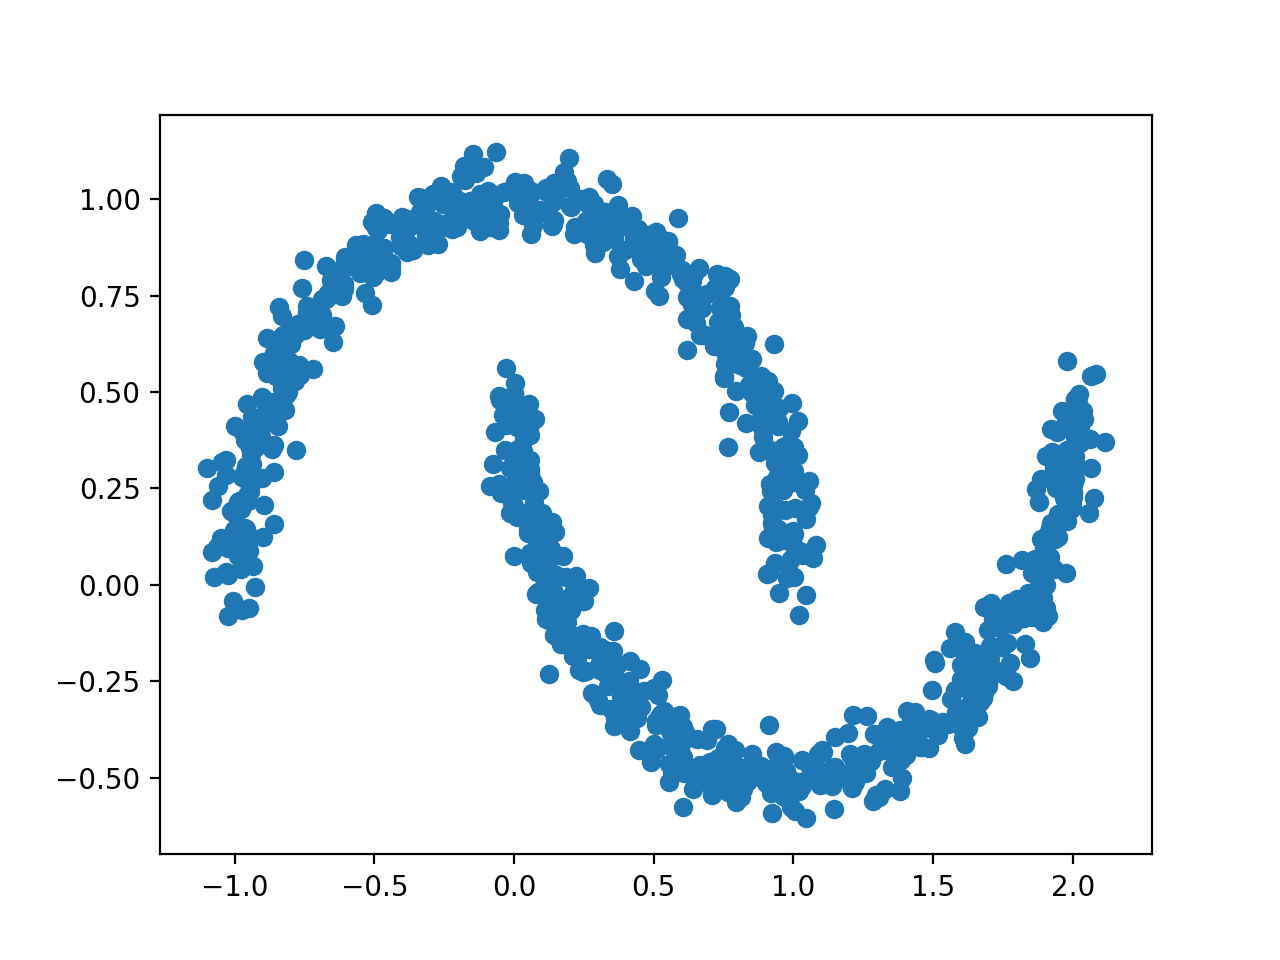

In [3]:
plt.scatter(X[:, 0], X[:, 1])

Compute Affinity matrix between the data points using an RBF Kernel

In [4]:
K = pairwise.rbf_kernel(X, X, gamma=1)

In [5]:
K.shape

(1000, 1000)

Compute the Degree Matrix and the (normalized) Laplacian

In [6]:
normed = True
L_sc, D_sc = csgraph.laplacian(K, return_diag=True, normed=normed)
print(L_sc)

[[ 1.00000000e+00 -1.67129368e-06 -2.49946903e-03 ... -1.30670384e-03
  -9.56992462e-05 -7.11147734e-04]
 [-1.67129368e-06  1.00000000e+00 -4.81357555e-07 ... -5.95695095e-05
  -2.99942711e-04 -1.96733045e-04]
 [-2.49946903e-03 -4.81357555e-07  1.00000000e+00 ... -4.09778028e-04
  -1.59388490e-04 -2.13218663e-04]
 ...
 [-1.30670384e-03 -5.95695095e-05 -4.09778028e-04 ...  1.00000000e+00
  -1.96648287e-04 -2.49182088e-03]
 [-9.56992462e-05 -2.99942711e-04 -1.59388490e-04 ... -1.96648287e-04
   1.00000000e+00 -3.27930681e-04]
 [-7.11147734e-04 -1.96733045e-04 -2.13218663e-04 ... -2.49182088e-03
  -3.27930681e-04  1.00000000e+00]]


In [7]:
evals, evectors = la.eigh(L_sc) # Matrix should be symmetric, so use `eigh`, not `eig`

<IPython.core.display.Javascript object>


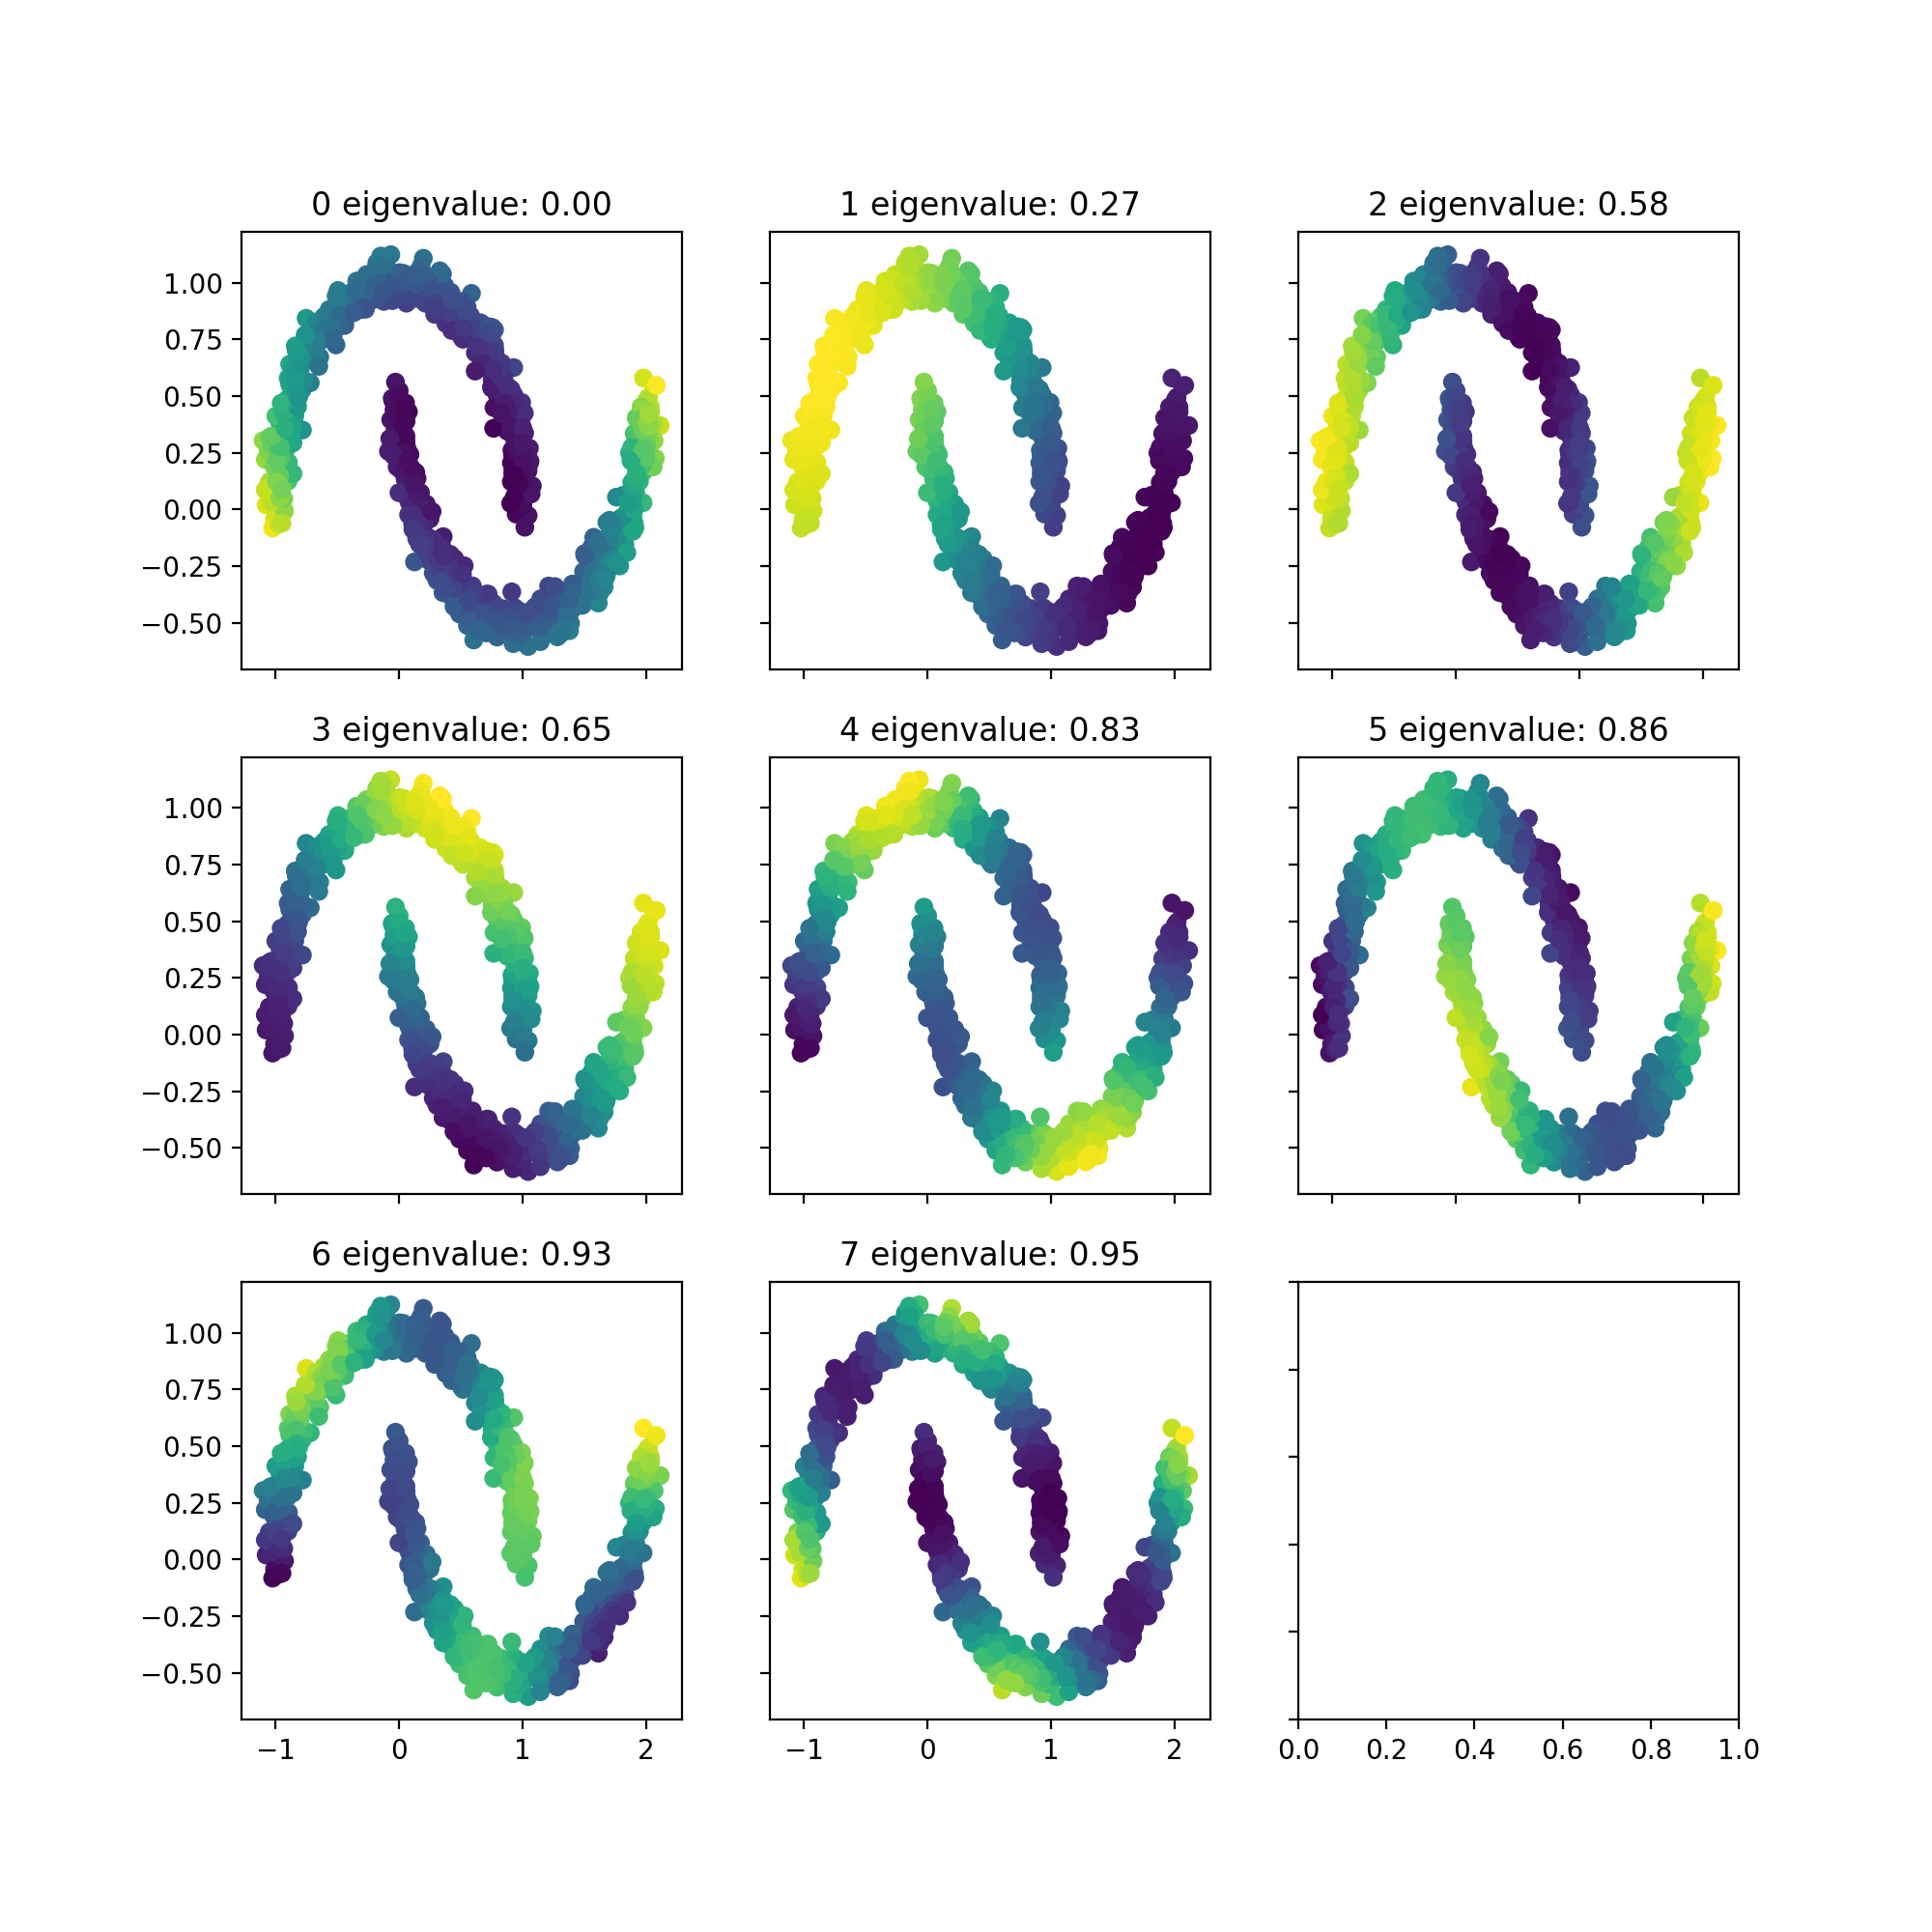

In [23]:
feats = evectors[:, :8] # get top-k eigenvalues, corresponding to smallest eigenvalues

# plot eigenvectors:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i in range(feats.shape[1]):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(X[:, 0], X[:, 1], c=feats[:, i])
    axs[row, col].set_title(f'{i} eigenvalue: {evals[i]:.2f}')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


<IPython.core.display.Javascript object>


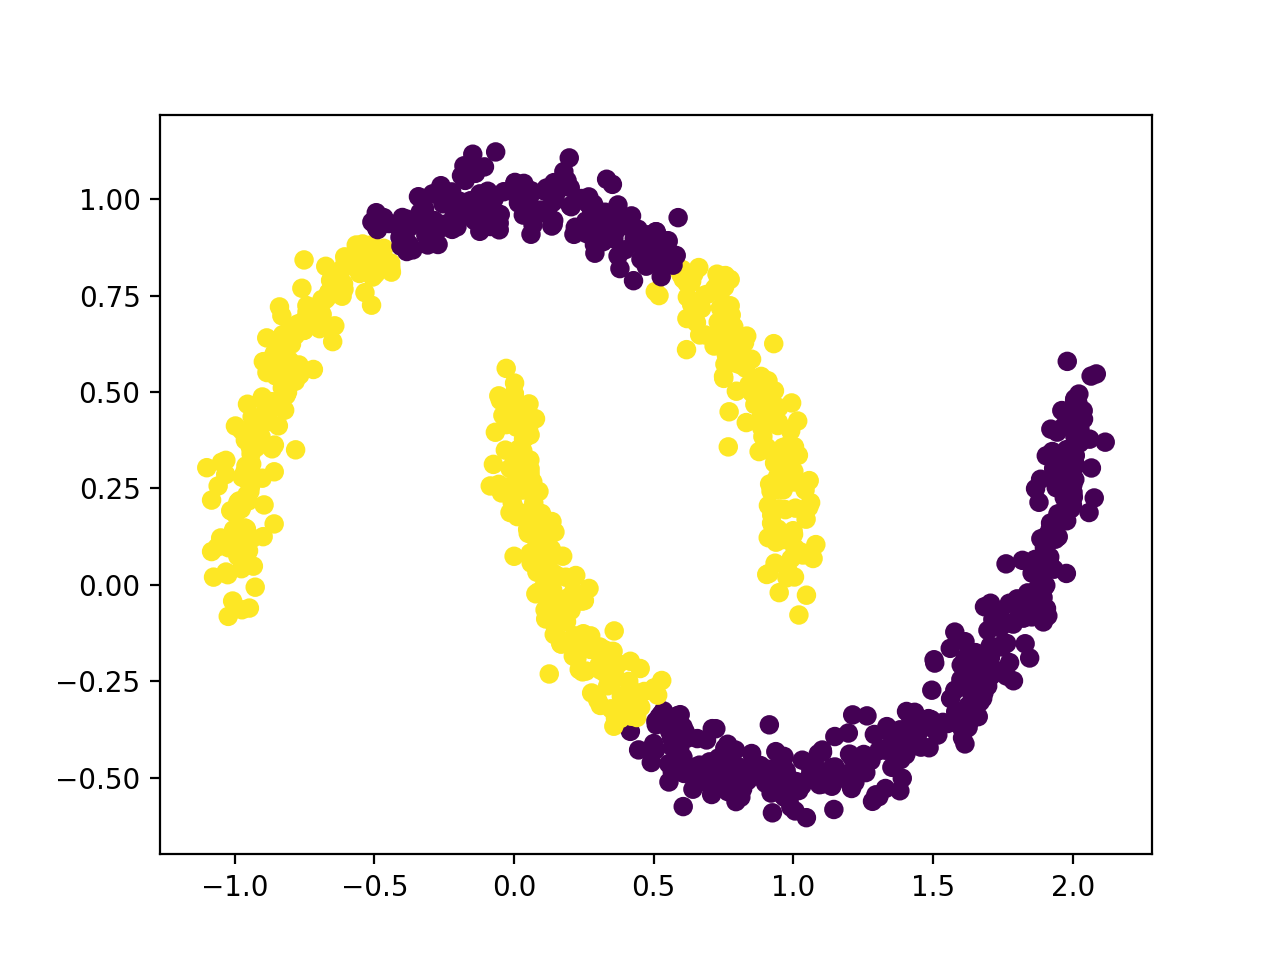

In [24]:
# my clustering
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(feats)
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

<IPython.core.display.Javascript object>


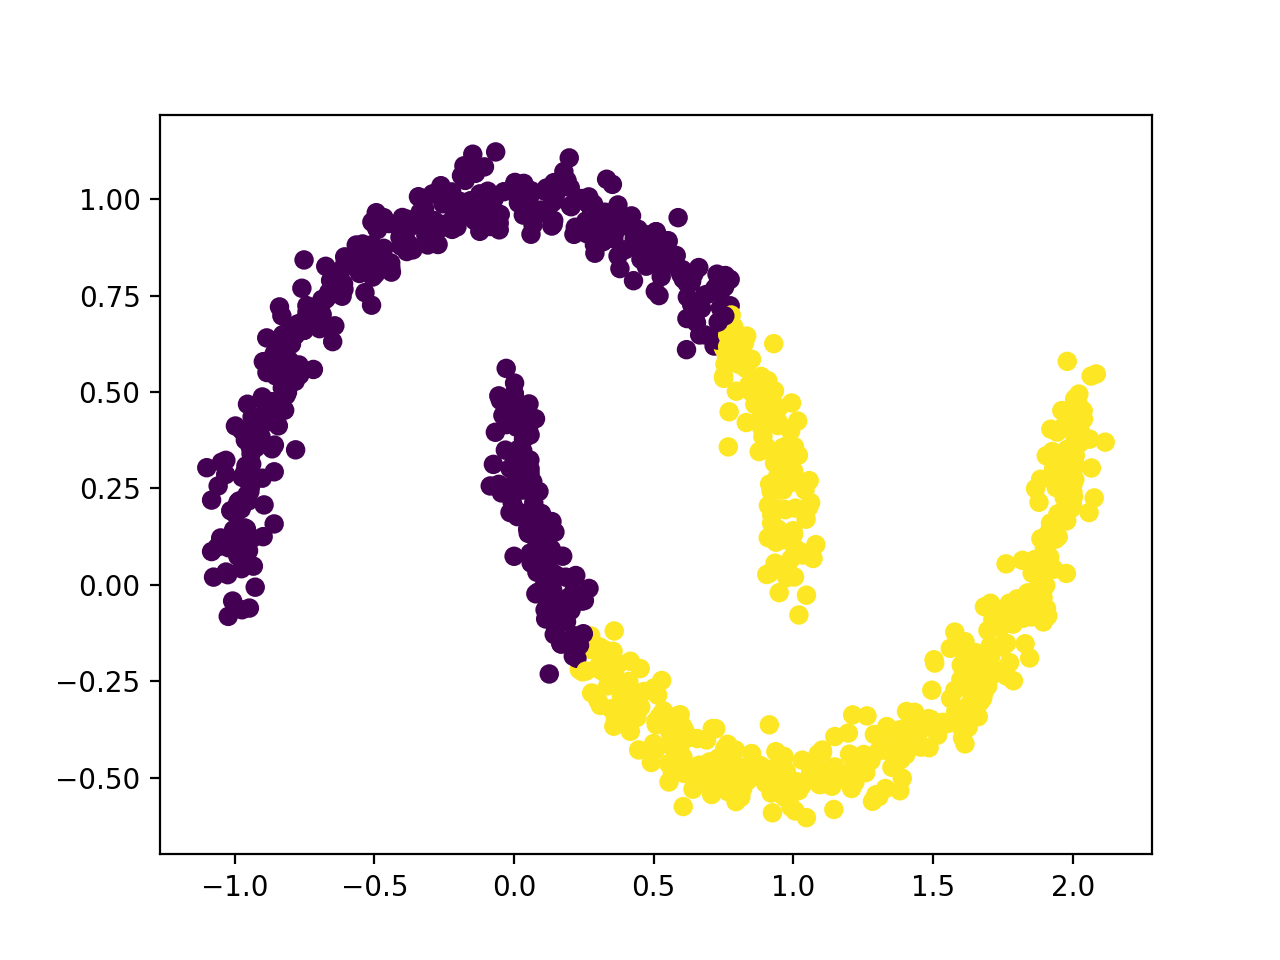

In [13]:
# with sklearn
from sklearn.cluster import SpectralClustering
y_pred = SpectralClustering(n_clusters=2, random_state=0).fit_predict(X)
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)